In [22]:
from __future__ import division
import pandas as pd
import networkx as nx
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#import holoviews as hv
#from holoviews import opts

import matplotlib as mpl
plt.style.use('seaborn')

In [13]:
# draw a network graph for all characters
def network_graph():
    df_edges=pd.read_csv('asoiaf-all-edges.csv')
    df_nodes=pd.read_csv('asoiaf-all-nodes.csv')
    def family(x):
        id_=x.split('-')
        return id_[-1]
    df_edges['Family']=df_edges['Source'].apply(family)
    df_edges['distance'] = 100-df_edges['weight']
    simple_network = nx.Graph()
    nodes=df_nodes['Id'].tolist()
    simple_network.add_nodes_from(nodes)
    edges=[]
    edge_colors = list()
    for i in range(len(df_edges['Source'])):
        edge=[df_edges['Source'].iloc[i],df_edges['Target'].iloc[i],df_edges['distance'].iloc[i]]
        edges.append(edge)
        simple_network.add_edge(edge[0],edge[1],distance=edge[2])
        edge_colors.append(edge[2])
    pos=nx.spring_layout(simple_network)
    node_sizes = [4*df_edges.loc[i,'weight'] for i in range(len(simple_network))]
    #print(node_sizes)
    M = simple_network.number_of_edges()
    edge_colors = range(2, M + 2)
    fig = plt.figure(1,figsize=(20,30))
    # nodes
    nx.draw_networkx_nodes(simple_network,pos,
                           node_color='skyblue',
                           node_size=node_sizes,alpha=0.8)

    # edges
    #nx.draw_networkx_edges(sub_graph,pos,width=1.0,alpha=0.5)
    nx.draw_networkx_edges(simple_network,pos,
                           edgelist=edges,
                           width=1,alpha=0.5,edge_color=edge_colors)


    node_name={}
    for node in simple_network.nodes():
        node_name[node]=str(node)
    #Bran Stark  Arya Stark  Cersei Lannister
    nodes1 = ['Bran-Stark','Sansa-Stark','Arya-Stark','Tyrion-Lannister', 'Cersei-Lannister','Daenerys-Targaryen', 'Jaime-Lannister', 'Jon-Snow']

    labels = {}    
    for node in simple_network.nodes():
        if node in nodes1:
            labels[node] = node

    nx.draw_networkx_labels(simple_network,pos,labels,font_size=15,font_color='r')

    plt.axis('off')
    fig.show() # display
    return simple_network


/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


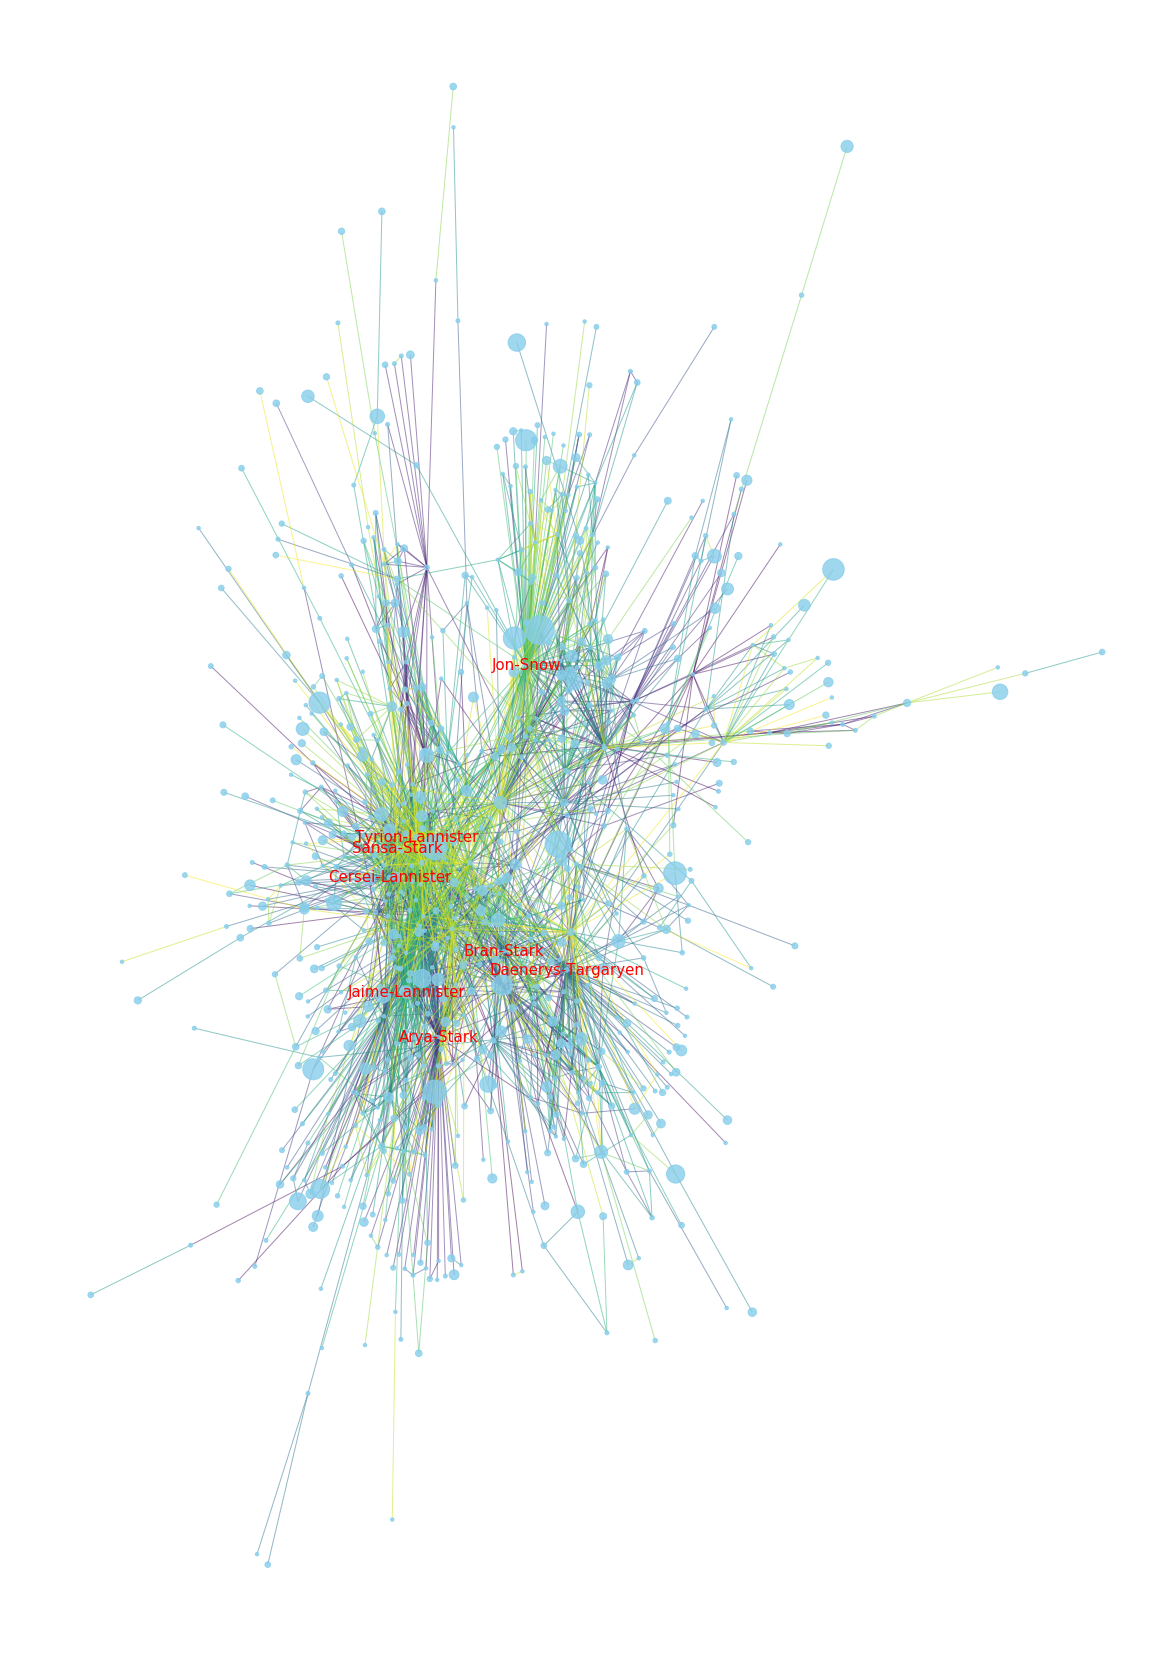

In [14]:
G=network_graph()

In [27]:
def main_chara_network():
    df=pd.read_csv('asoiaf-all-edges.csv')
    df=df[(df['Source'] == 'Cersei-Lannister') | (df['Source'] == 'Jaime-Lannister') | (df['Source'] =='Jon-Snow') | (df['Source'] =='Arya-Stark') | (df['Source'] =='Daenerys-Targaryen')| (df['Source'] =='Sansa-Stark')| (df['Source'] =='Bran-Stark')| (df['Source'] =='Jaime-Lannister') ]
    def node_group(x):
        if x=='Cersei-Lannister':
            return 'Group1'
        elif x=='Jaime-Lannister':
            return 'Group2'
        elif x=='Jon-Snow':
            return 'Group3'
        elif x=='Arya-Stark':
            return 'Group4'
        elif x=='Sansa-Stark':
            return 'Group5'
        elif x=='Bran-Stark':
            return 'Group6'
        elif x=='Tyrion-Lannister':
            return 'Group7'
        else:
            return 'Group8'
    df['group']=df['Source'].apply(node_group)
    df['group']=pd.Categorical(df['group'])
    df['distance']=100-df['weight']
    edges=[]
    nodes1=df['Source'].unique().tolist()
    nodes2=df['Target'].unique().tolist()
    nodes=[]
    nodes=[node for node in nodes1 and nodes2 if node not in nodes]
    for i in range(len(df['Source'])):
        edge=[df['Source'].iloc[i],df['Target'].iloc[i],df['distance'].iloc[i]]
        edges.append(edge)
    G_C=nx.Graph()
    G_C.add_nodes_from(nodes)
    for e in edges:
        G_C.add_edge(e[0],e[1],distance=e[2])
    pos = nx.spring_layout(G_C)
    labels = {}    
    for node in G_C.nodes():
        if node in nodes1:
            labels[node] = node
    fig=plt.figure(1,figsize=(12,12))
    nx.draw(G_C, pos,labels=labels,font_size=20,font_color='r',node_color='skyblue', node_size=300, 
            edge_color=df['group'].cat.codes, 
            width=2.0, 
            edge_cmap=plt.cm.Set2)
    plt.show()
    return


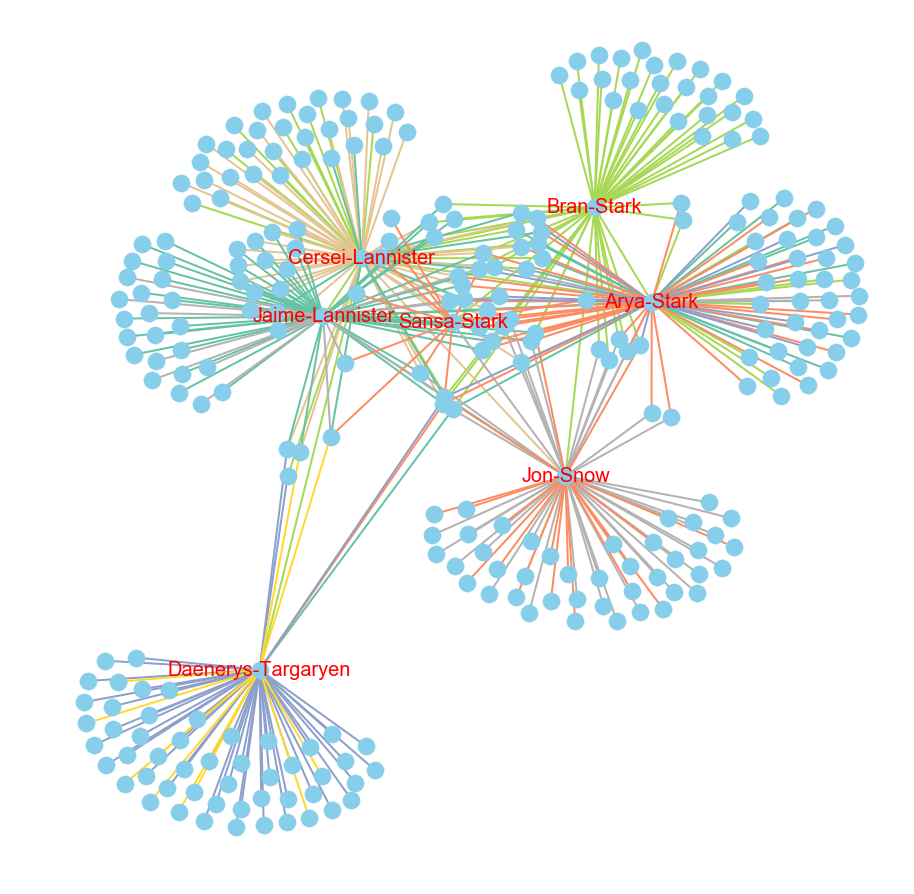

In [28]:
main_chara_network()

In [15]:
#nearest relationship to all other nodes
def closeness_centrality(G):
    from networkx.algorithms import closeness_centrality
    c_c = closeness_centrality(G,distance='weight')
    #from collections import OrderedDict
    #cc = OrderedDict(sorted(c_c.items(),key = lambda x: x[1],reverse = True))
    closeness=[(key,value) for key,value in c_c.items()]
    closeness.sort(key=lambda k:k[1],reverse=True)
    return closeness[:20]

In [17]:
# bottleneck for all characters
def bottleneck(G):
    from networkx.algorithms import closeness_centrality
    bottleneck = nx.betweenness_centrality(G)
    bottleneck_node = max(bottleneck, key=bottleneck.get)
    bottleneck=[(key,value) for key,value in bottleneck.items()]
    bottleneck.sort(key=lambda k:k[1],reverse=True)
    return bottleneck[:20]

In [23]:
def draw_plot(list_):
    fig = plt.figure(figsize=(12, 8))
    count=np.array([list_[i][1] for i in range(len(list_))])
    name=np.array([list_[i][0] for i in range(len(list_))])
    plt.plot(name,count,marker='o')
    plt.xticks(rotation = 45, fontsize = 16)
    plt.yticks(fontsize = 12)
    plt.show()
    return

In [19]:
closeness=closeness_centrality(simple_network)
bottleneck=bottleneck(simple_network)

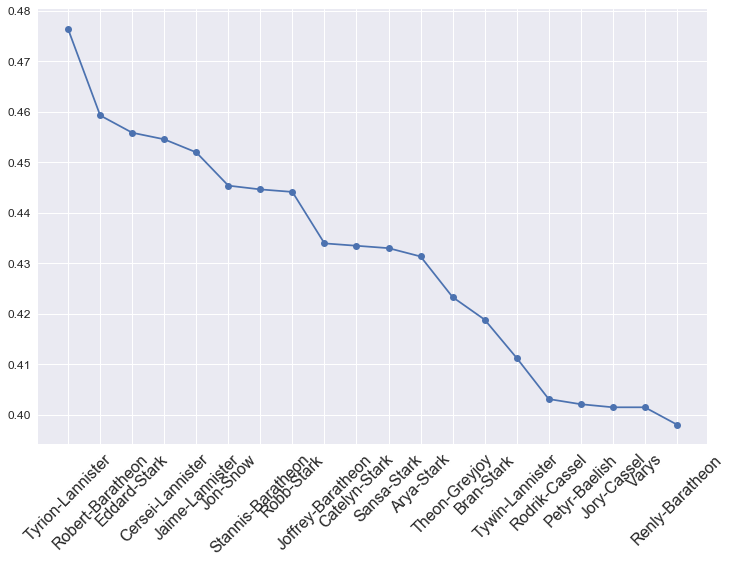

In [24]:
draw_plot(closeness)

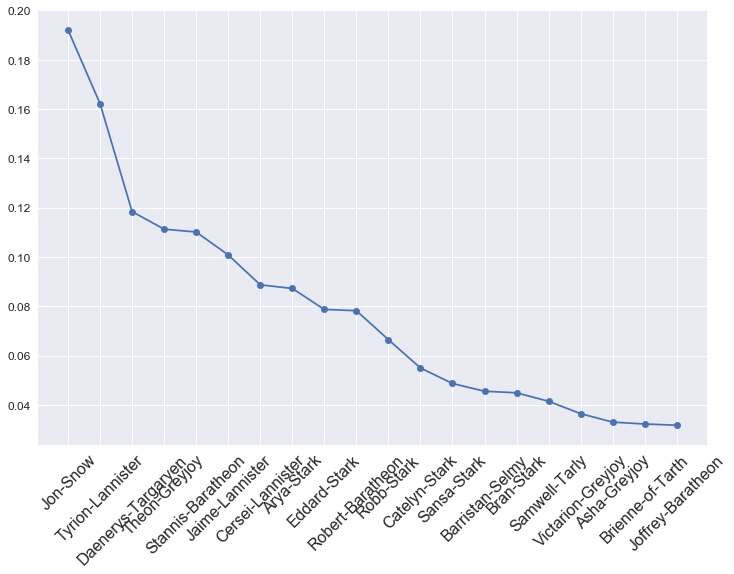

In [25]:
draw_plot(bottleneck)